# Movie Success Analysis
- Author: Loveida Lucero

# Project Overview

Produce a MySQL database on Movies from a subset of IMDB's publicly available dataset. You will use this database to analyze what makes a movie successful and will provide recommendations on how to make a successful movie.

**Imports**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import os

In [2]:
# Confirm folder was created and files added successfully
os.listdir("Data/")

['.ipynb_checkpoints',
 'basics.csv',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'IMDB Movie Dataset Info.docx',
 'movies model.mwb',
 'Movies-ERD.png',
 'movies.sql',
 'ratings.csv',
 'title-akas-us-only.csv',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_resu

**Load and Display Data**

In [3]:
akas = pd.read_csv('Data/title-akas-us-only.csv', low_memory=False)

In [4]:
akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452564 entries, 0 to 1452563
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          1452564 non-null  object
 1   ordering         1452564 non-null  int64 
 2   title            1452564 non-null  object
 3   region           1452564 non-null  object
 4   language         1452564 non-null  object
 5   types            1452564 non-null  object
 6   attributes       1452564 non-null  object
 7   isOriginalTitle  1452564 non-null  object
dtypes: int64(1), object(7)
memory usage: 88.7+ MB


In [5]:
basics = pd.read_csv('Data/title.basics.tsv.gz', sep='\t', low_memory=False)

In [6]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10017011 entries, 0 to 10017010
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 687.8+ MB


In [7]:
ratings = pd.read_csv('Data/title.ratings.tsv.gz', sep='\t', low_memory=False)

In [8]:
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331492 entries, 0 to 1331491
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1331492 non-null  object 
 1   averageRating  1331492 non-null  float64
 2   numVotes       1331492 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 30.5+ MB


,tconst,averageRating,numVotes
0,tt0000001,5.7,1988
1,tt0000002,5.8,265
2,tt0000003,6.5,1849
3,tt0000004,5.5,178
4,tt0000005,6.2,2632


## Prep **Basics** Data

In [9]:
# Filter the basics table down to only include the US by using the filter akas dataframe
filter_us_titles = basics['tconst'].isin(akas['titleId'])
basics = basics[filter_us_titles]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
...,...,...,...,...,...,...,...,...,...
10016872,tt9916560,tvMovie,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,\N,58,Family
10016901,tt9916620,movie,The Copeland Case,The Copeland Case,0,\N,\N,\N,Drama
10016939,tt9916702,short,Loving London: The Playground,Loving London: The Playground,0,\N,\N,\N,"Drama,Short"
10016962,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0,2019,\N,\N,Short


### Null Values

In [10]:
# Convert placeholder back to null
basics = basics.replace({'\\N':np.nan})

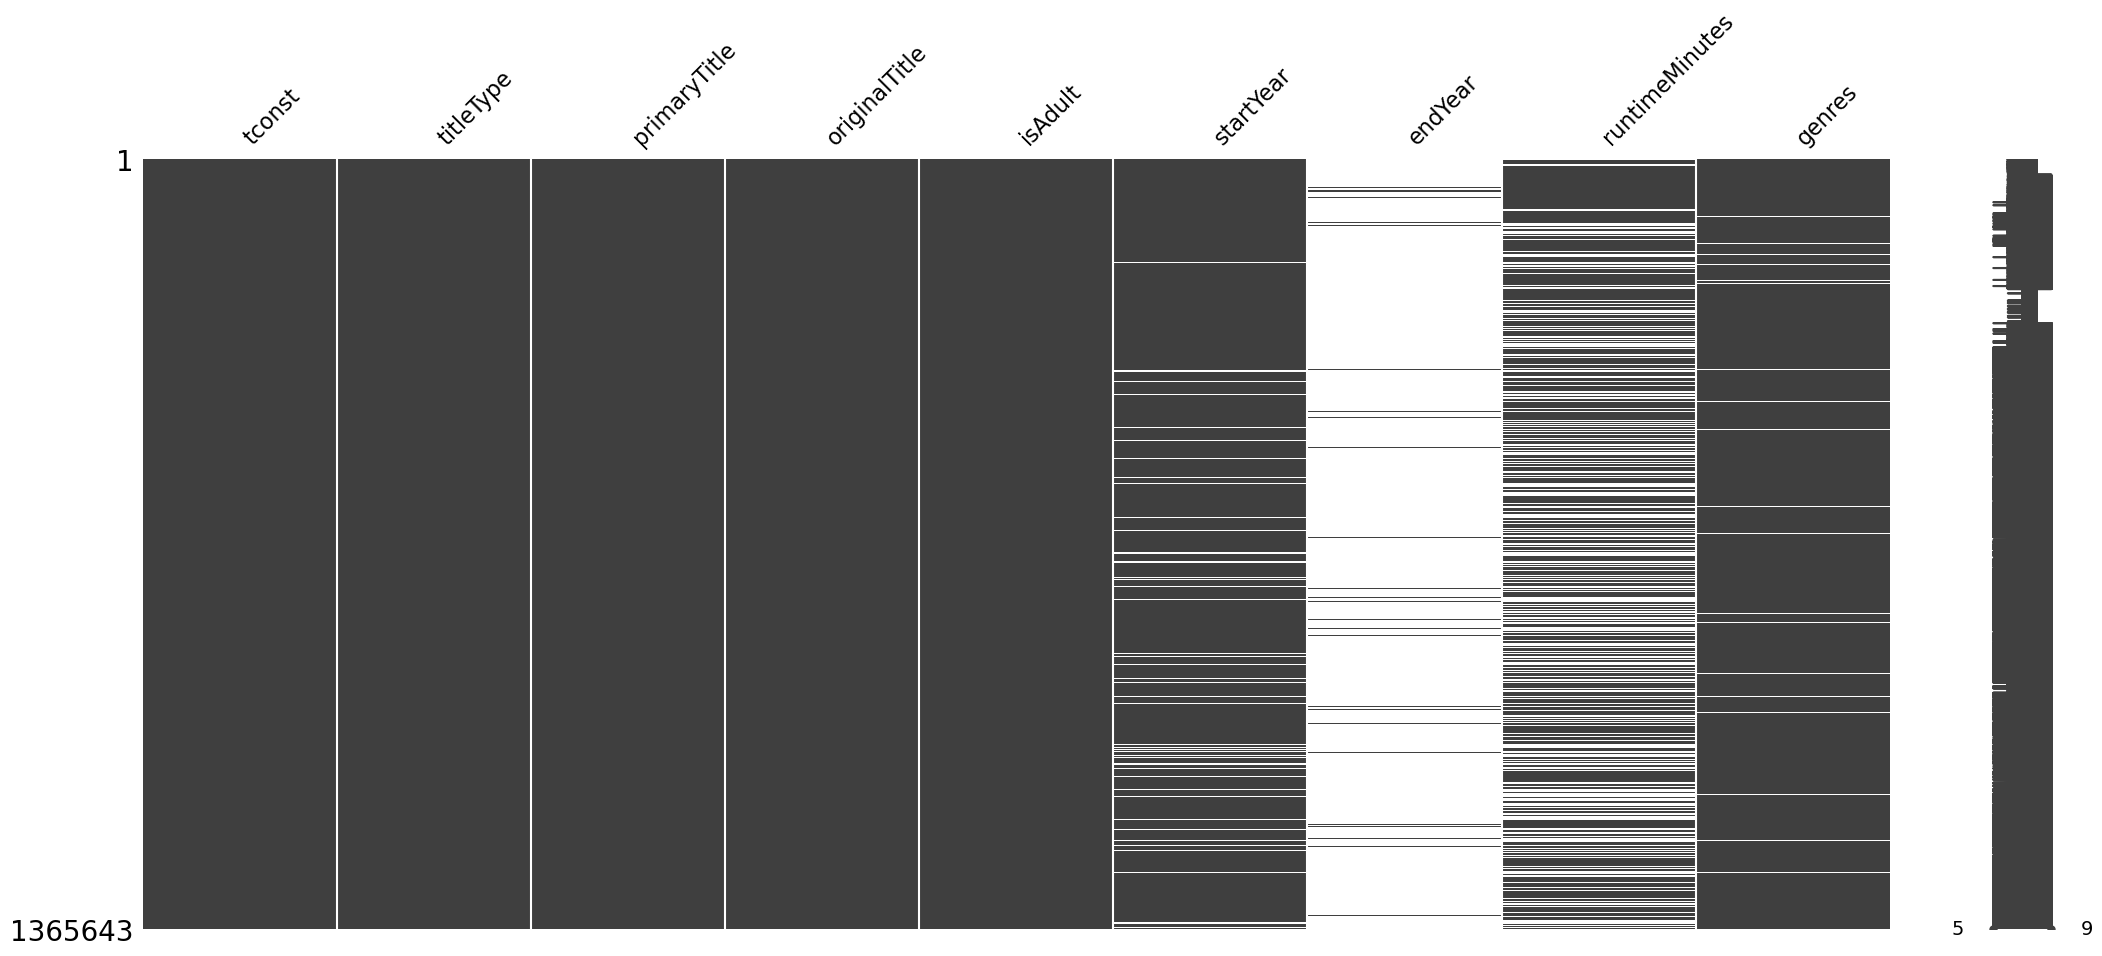

In [11]:
# Display null matrix
msno.matrix(basics);

In [12]:
# Drop rows with null values in runtimeMinutes and genres columns
basics = basics.dropna(subset=['runtimeMinutes', 'genres'])

In [13]:
# Confirm runtimeMinutes has no remaining null values
basics['runtimeMinutes'].isna().sum().sum()

0

In [14]:
# Confirm genres has no remaining null values
basics['genres'].isna().sum().sum()

0

- Rows with null values in runtimeMinutes and genres have been renoved.

### Filter **titleType**

In [15]:
# Create movie filter
filter_movie = basics['titleType'] == 'movie'
# Apply movie filter
basics = basics[filter_movie]
# Display
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,NaN,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,NaN,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,NaN,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...
10016366,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019,NaN,70,Documentary
10016544,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019,NaN,97,"Comedy,Drama,Fantasy"
10016684,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,NaN,51,Drama
10016693,tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,95,"Action,Adventure,Thriller"


### DataType of **startYear**

In [16]:
# Check type 
basics['startYear'].dtypes

dtype('O')

In [17]:
basics['startYear'] = basics['startYear'].astype(float)

In [18]:
# Confirm type change
basics['startYear'].dtypes

dtype('float64')

- DataType for startYear has been changed to a float.

### Filter Movie Year 2000-2022

In [19]:
# Create filter to remove under 2000
filter_year1 = basics['startYear'] >=2000
# Apply filter
basics = basics[filter_year1]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
93930,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...
10016366,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019.0,NaN,70,Documentary
10016544,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy"
10016684,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"


In [20]:
# Create filter to remove over 2022
filter_year2 = basics['startYear'] <=2022
# Apply filter
basics = basics[filter_year2]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
93930,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...
10016366,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019.0,NaN,70,Documentary
10016544,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy"
10016684,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"


- Only movies with startYear between 2000-2022 remain. 

### Filter Out **Documentaries**

In [21]:
# Create filter for documentary
filter_documentaries = basics['genres'].str.contains('Documentary')
# Apply inverse filter to remove documentary
basics = basics[~filter_documentaries]
# Display
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
93930,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...
10016149,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,NaN,74,Drama
10016544,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy"
10016684,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"


- Documentaries have been removed. 

### Display and Save **Prepped** **Basics** Data

In [22]:
# Display basics data
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86979 entries, 34802 to 10016777
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          86979 non-null  object 
 1   titleType       86979 non-null  object 
 2   primaryTitle    86979 non-null  object 
 3   originalTitle   86979 non-null  object 
 4   isAdult         86979 non-null  object 
 5   startYear       86979 non-null  float64
 6   endYear         0 non-null      object 
 7   runtimeMinutes  86979 non-null  object 
 8   genres          86979 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.6+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
93930,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


## Prep **Ratings** Data

In [23]:
# create filter to include titles from basics
filter_basics = ratings['tconst'].isin(basics['tconst'])
ratings = ratings[filter_basics]
ratings

,tconst,averageRating,numVotes
17961,tt0035423,6.4,87153
40764,tt0062336,6.4,175
46645,tt0069049,6.7,7754
63640,tt0088751,5.2,336
69953,tt0096056,5.6,846
...,...,...,...
1331411,tt9914942,6.6,178
1331437,tt9915872,6.4,9
1331450,tt9916170,7.0,7
1331451,tt9916190,3.7,243


In [24]:
basics_out = 'Data/basics.csv'
basics.to_csv(basics_out, index=False)

### Null Values

In [25]:
# Convert placeholder back to null
ratings = ratings.replace({'\\N':np.nan})

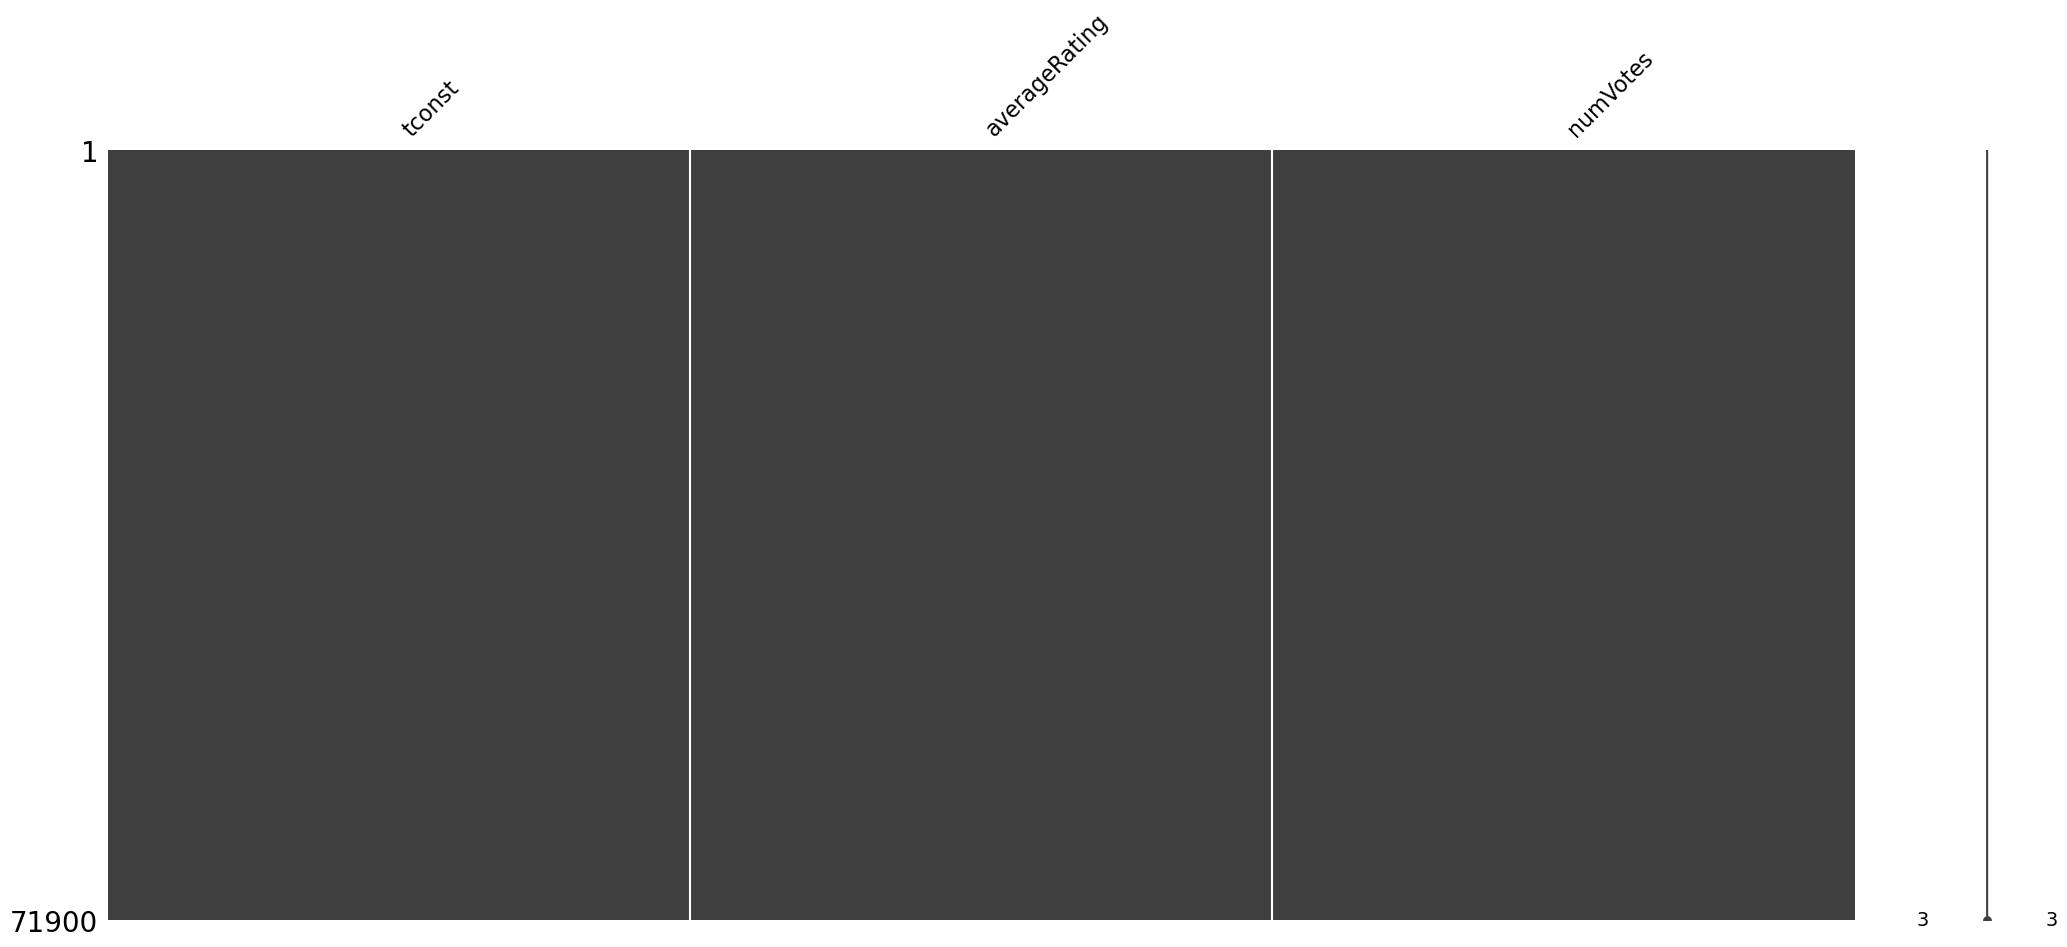

In [26]:
# Display null matrix
msno.matrix(ratings);

In [27]:
ratings.isna().sum().sum()

0

- There are no null values in the data. 

### Display **Prepped Ratings** Data

In [28]:
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71900 entries, 17961 to 1331462
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         71900 non-null  object 
 1   averageRating  71900 non-null  float64
 2   numVotes       71900 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


,tconst,averageRating,numVotes
17961,tt0035423,6.4,87153
40764,tt0062336,6.4,175
46645,tt0069049,6.7,7754
63640,tt0088751,5.2,336
69953,tt0096056,5.6,846


In [29]:
ratings_out = 'Data/ratings.csv'
ratings.to_csv(ratings_out, index=False)